# **EXPLORATORY DATA ANALYSIS ON MOBILE PHONES DATASET**

**IMPORTING REQUIRED MODULES**

In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

**READING THE CSV FILE OF THE DATASET**

In [2]:
df = pd.read_csv('mobile-phones.csv')

In [3]:
df.head()

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,Android,White,Greater Accra,Circle,6.10,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,Android,Bronze,Greater Accra,Circle,6.90,4500.0,128.0,12.0,10.0,5000.0
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.40,5000.0,256.0,8.0,32.0,3000.0
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.67,5000.0,256.0,8.0,32.0,1900.0
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.80,5000.0,512.0,12.0,40.0,5750.0


**FIRSTLY, IT IS A GOOD PRACTICE TO LOOK FOR OUTLIERS**

In [4]:
df.describe()

,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
count,3473.000000,3430.000000,3597.000000,2812.000000,3293.000000,3600.000000
mean,5.904221,3788.813703,145.168752,6.143670,13.059824,3442.216667
std,0.582931,896.597135,109.056178,2.750244,9.454200,3037.076480
min,1.800000,520.000000,4.000000,1.000000,0.000000,110.000000
25%,5.800000,3110.000000,64.000000,4.000000,8.000000,1600.000000
50%,6.100000,3700.000000,128.000000,6.000000,10.000000,2600.000000
75%,6.100000,4500.000000,128.000000,8.000000,13.000000,3850.000000
max,7.600000,7000.000000,1024.000000,16.000000,40.000000,26650.000000


**IT CAN BE OBSERVED THAT THERE ARE NO OUTLIERS IN ALL THE DATAFRAME SERIES**

**LET'S START WITH LOOKING FOR NULL VALUES**

In [5]:
df.isna().sum()

brand                  0
model                  0
sd_card                0
main_camera          235
resolution           536
display              566
sim_card             790
os                   219
color                  0
region                 0
location               0
screen_size(inch)    127
battery(mAh)         170
storage(GB)            3
ram(GB)              788
selfie_camera(MP)    307
price(¢)               0
dtype: int64

**LET'S START WITH STORAGE AS ONLY 3 VALUES ARE NULL HERE**

In [6]:
df[df['storage(GB)'].isna()]

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
2534,Itel,IT5081,yes,1 Cameras: 13 MP,240 x 320,TFT,Dual,Windows Mobile,Black,Greater Accra,Santa Maria,4.0,1200.0,NaN,NaN,NaN,220.0
2539,X-Tigi,3307,yes,1 Cameras: 02 MP,240 x 240,IPS LCD,Dual,Android,Black,Greater Accra,Santa Maria,4.0,520.0,NaN,NaN,NaN,170.0
2546,Tecno,T529,yes,1 Cameras: 03 MP,240 x 320,IPS LCD,Dual,Nucleus OS,Black,Greater Accra,Santa Maria,4.0,2500.0,NaN,NaN,NaN,389.0


**WE ARE NOTICING A SIMILAR PATTERN IN THE ABOVE THREE ROWS. ALL THESE THREE BRANDS HAVE VERY LIMITED INTERNAL STORAGE, WHICH IS NOT GENERALLY MEASURED IN GB BUT IN MB. ALSO, WE CAN EASILY LOOK UP THE STORAGE VALUES OF THEM AS THERE ARE JUST THREE OF THEM!**

In [7]:
df['storage(GB)'].describe()

count    3597.000000
mean      145.168752
std       109.056178
min         4.000000
25%        64.000000
50%       128.000000
75%       128.000000
max      1024.000000
Name: storage(GB), dtype: float64

**WE OBSERVE THAT MINIMUM 4 GB STORAGE IS PRESENT, BUT OUR THREE BRANDS DON'T EVEN HAVE 1GB. IT'S AROUND 64MB SO LET'S GIVE 0.06 TO ALL OF THEM**

In [8]:
df['storage(GB)'].fillna(0.06,inplace=True)

In [9]:
df['storage(GB)'].isna().sum()

0

**NEXT LET'S GET TO SCREEN_SIZE(INCH)**

In [10]:
df[df['screen_size(inch)'].isna()]

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
48,Vivo,Y66i,yes,NaN,720 x 1280,IPS,Nano-SIM,Android,Gold,Greater Accra,Kokomlemle,NaN,3000.0,32.0,NaN,NaN,850.0
67,LG,Wing 5G,yes,TRIPLE 64MP / 12MP / 13MP,1080 x 2460 / 1080 x 1240,OLED,Dual,Android,Black,Greater Accra,Kokomlemle,NaN,4000.0,256.0,8.0,32.0,3150.0
86,Huawei,Nova 2 Plus,yes,NaN,1080 x 1920,IPS LCD,Dual,Android,Black,Greater Accra,Kokomlemle,NaN,3340.0,128.0,NaN,NaN,1350.0
142,LG,Wing 5G,yes,TRIPLE 64MP / 12MP / 13MP,1080 x 2460 / 1080 x 1240,OLED,Dual,Android,Other,Greater Accra,Accra Metropolitan,NaN,4000.0,128.0,8.0,32.0,3650.0
172,Google,Pixel 6 Pro,no,NaN,NaN,NaN,NaN,NaN,White,Ashanti,Kumasi Metropolitan,NaN,NaN,128.0,NaN,NaN,3999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,Samsung,Galaxy S10 Plus,yes,"3 Cameras: 12, 12, 16 MP",NaN,NaN,Single,Android,Other,Ashanti,Kumasi Metropolitan,NaN,4100.0,128.0,8.0,10.0,2550.0
3589,Samsung,Galaxy Note 10 Plus,yes,"3 Cameras: 16, 12, 12 MP",NaN,NaN,NaN,Android,Black,Greater Accra,Accra Metropolitan,NaN,4300.0,256.0,12.0,10.0,3250.0
3590,Samsung,Galaxy A51,yes,"4 Cameras: 48, 12, 5, 5 MP",NaN,NaN,Dual,Android,Black,Ashanti,Kumasi Metropolitan,NaN,4000.0,128.0,6.0,32.0,1600.0
3593,Samsung,Galaxy Note 9,yes,"2 Cameras: 12, 12 MP",NaN,NaN,Single,Android,Black,Greater Accra,Accra Metropolitan,NaN,4000.0,128.0,8.0,8.0,1950.0


In [11]:
df['screen_size(inch)'].describe()

count    3473.000000
mean        5.904221
std         0.582931
min         1.800000
25%         5.800000
50%         6.100000
75%         6.100000
max         7.600000
Name: screen_size(inch), dtype: float64

**IT CAN BE SEEN THAT MEAN VALUE OF SCREEN SIZES IS APPROXIMATELY 5.9**

In [12]:
df['screen_size(inch)'].fillna(df['screen_size(inch)'].mean(),inplace=True)

In [13]:
df['screen_size(inch)'].isna().sum()

0

**NEXT LET'S SOLVE THE NULL VALUE PROBLEM FOR 'BATTERY(MAH)'**

In [14]:
df['battery(mAh)'].isna().sum()

170

In [15]:
df['battery(mAh)'].describe()

count    3430.000000
mean     3788.813703
std       896.597135
min       520.000000
25%      3110.000000
50%      3700.000000
75%      4500.000000
max      7000.000000
Name: battery(mAh), dtype: float64

In [16]:
df['battery(mAh)'].fillna(df['battery(mAh)'].mean(),inplace=True)

In [17]:
df['battery(mAh)'].isna().sum()

0

In [18]:
df.isna().sum()

brand                  0
model                  0
sd_card                0
main_camera          235
resolution           536
display              566
sim_card             790
os                   219
color                  0
region                 0
location               0
screen_size(inch)      0
battery(mAh)           0
storage(GB)            0
ram(GB)              788
selfie_camera(MP)    307
price(¢)               0
dtype: int64

**TIME FOR OS**

In [19]:
df['os'].describe()

count        3381
unique         10
top       Android
freq         2704
Name: os, dtype: object

In [20]:
df['os'].unique()

array(['Android', 'iOS', nan, 'IOS', 'Harmony', 'Symbian',
       'Windows Mobile', 'Nucleus OS', 'Java', '5000', 'Windows'],
      dtype=object)

**WE CAN SEE THAT THERE ARE NAN VALUES AND ALSO THERE IS THIS VALUE '5000' WHICH IS CLEARLY NOT AN OS NAME, SO WE NEED TO REMOVE BOTH.
LET'S SEE THE FREQUENCY OF EACH OS**

In [21]:
df['os'].value_counts()

os
Android           2704
IOS                562
iOS                105
Harmony              4
Symbian              1
Windows Mobile       1
Nucleus OS           1
Java                 1
5000                 1
Windows              1
Name: count, dtype: int64

**THE MAXIMUM FREQUENCY IS OF 'ANDROID' FOLLOWED BY 'IOS'. ALSO IOS IS OCCURING TWICE WITH DIFFERENT CAPS OF I. WE NEED TO CHANGE THAT. IT'S BETTER TO RANDOMLY ASSIGN 'ANDROID' AND 'IOS' TO THE MISSING VALUES**


In [22]:
df['os'] = df['os'].replace({'iOS': 'IOS'})
df['os'] = df['os'].apply(lambda x: random.choice(['Android','IOS']) if (pd.isnull(x) or x=='5000') else x)

In [23]:
df['os'].unique()

array(['Android', 'IOS', 'Harmony', 'Symbian', 'Windows Mobile',
       'Nucleus OS', 'Java', 'Windows'], dtype=object)

In [24]:
df['os'].value_counts()

os
Android           2816
IOS                775
Harmony              4
Symbian              1
Windows Mobile       1
Nucleus OS           1
Java                 1
Windows              1
Name: count, dtype: int64

In [25]:
df['os'].isna().sum()

0

In [26]:
df.isna().sum()

brand                  0
model                  0
sd_card                0
main_camera          235
resolution           536
display              566
sim_card             790
os                     0
color                  0
region                 0
location               0
screen_size(inch)      0
battery(mAh)           0
storage(GB)            0
ram(GB)              788
selfie_camera(MP)    307
price(¢)               0
dtype: int64

**LET'S GET TO 'MAIN CAMERA'**

In [27]:
df['main_camera'].describe()

count                 3365
unique                 125
top       1 Cameras: 12 MP
freq                   611
Name: main_camera, dtype: object

In [28]:
df['main_camera'].value_counts()

main_camera
1 Cameras: 12 MP            611
2 Cameras: 12, 12 MP        399
3 Cameras: 12, 12, 16 MP    168
1 Cameras: 16 MP            106
3 Cameras: 16, 12, 12 MP    101
                           ... 
TRIPLE 12MP / 12MP / 8MP      1
3 Cameras: 50, 12, 40 MP      1
3 Cameras: 50, 40, 12 MP      1
TRIPLE 64MP / 2MP / 2MP       1
3 Cameras: 108, 8, 2 MP       1
Name: count, Length: 125, dtype: int64

**LET'S GET RANDOM AMONG TOP FIVE SPECIFICATIONS**

In [29]:
df['main_camera'] = df['main_camera'].apply(lambda x: random.choice(['1 Cameras: 12 MP','2 Cameras: 12, 12 MP','3 Cameras: 12, 12, 16 MP ','1 Cameras: 16 MP','3 Cameras: 16, 12, 12 MP']) if pd.isnull(x) else x)

In [30]:
df['main_camera'].value_counts()

main_camera
1 Cameras: 12 MP            655
2 Cameras: 12, 12 MP        450
3 Cameras: 12, 12, 16 MP    168
3 Cameras: 16, 12, 12 MP    163
1 Cameras: 16 MP            137
                           ... 
TRIPLE 12MP / 12MP / 8MP      1
3 Cameras: 50, 12, 40 MP      1
3 Cameras: 50, 40, 12 MP      1
TRIPLE 64MP / 2MP / 2MP       1
3 Cameras: 108, 8, 2 MP       1
Name: count, Length: 126, dtype: int64

In [31]:
df['main_camera'].isna().sum()

0

In [32]:
df.isna().sum()

brand                  0
model                  0
sd_card                0
main_camera            0
resolution           536
display              566
sim_card             790
os                     0
color                  0
region                 0
location               0
screen_size(inch)      0
battery(mAh)           0
storage(GB)            0
ram(GB)              788
selfie_camera(MP)    307
price(¢)               0
dtype: int64

**LET'S GET TO SELFIE CAMERA**

In [33]:
df['selfie_camera(MP)'].describe()

count    3293.000000
mean       13.059824
std         9.454200
min         0.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        40.000000
Name: selfie_camera(MP), dtype: float64

In [34]:
df['selfie_camera(MP)'].fillna(40,inplace=True)

In [35]:
df['selfie_camera(MP)'].isna().sum()

0

**LET'S RECTIFY NULL VALUE PROBLEM OF 'RESOLUTION'**

In [36]:
df['resolution'].value_counts()

resolution
1080 x 2400    470
1080 x 2340    282
1080 x 1920    219
1440 x 2560    155
1440 x 2960    141
              ... 
1080 x 2520      1
240 x 240        1
1080 x 2248      1
320 x 240        1
96 x 65          1
Name: count, Length: 68, dtype: int64

**LET'S FILL IN TOP THREE VALUES RANDOMLY**

In [37]:
df['resolution'] = df['resolution'].apply(lambda x: random.choice(['1080 x 2400','1080 x 2340','1080 x 1920']) if pd.isnull(x) else x)

In [38]:
df['resolution'].isna().sum()

0

In [39]:
df['resolution'].value_counts()

resolution
1080 x 2400    631
1080 x 2340    471
1080 x 1920    405
1440 x 2560    155
1440 x 2960    141
              ... 
1080 x 2520      1
240 x 240        1
1080 x 2248      1
320 x 240        1
96 x 65          1
Name: count, Length: 68, dtype: int64

**LET'S GET TO DISPLAY** 

In [40]:
df['display'].isna().sum()

566

In [41]:
df['display'].describe()

count        3034
unique         19
top       IPS LCD
freq          635
Name: display, dtype: object

In [42]:
df['display'].value_counts()

display
IPS LCD                            635
Super AMOLED                       588
AMOLED                             580
OLED                               355
Super Retina OLED                  230
P-OLED                             214
Retina IPS LCD                     165
TFT                                142
IPS                                 59
P-OLED+                             22
Dynamic AMOLED                      17
PLS LCD                             14
PLS                                  5
Monochrome                           3
G-OLED                               1
Super LCD3                           1
TN                                   1
Retina IPS                           1
Dynamic AMOLED / Dynamic AMOLED      1
Name: count, dtype: int64

**WE'LL GO FOR TOP FOUR**

In [43]:
df['display'] = df['display'].apply(lambda x: random.choice(['IPS LCD','Super AMOLED','AMOLED','OLED']) if pd.isnull(x) else x)

In [44]:
df['display'].isna().sum()

0

In [45]:
df['display'].value_counts()

display
IPS LCD                            788
Super AMOLED                       730
AMOLED                             710
OLED                               496
Super Retina OLED                  230
P-OLED                             214
Retina IPS LCD                     165
TFT                                142
IPS                                 59
P-OLED+                             22
Dynamic AMOLED                      17
PLS LCD                             14
PLS                                  5
Monochrome                           3
G-OLED                               1
Super LCD3                           1
TN                                   1
Retina IPS                           1
Dynamic AMOLED / Dynamic AMOLED      1
Name: count, dtype: int64

In [46]:
df.isna().sum()

brand                  0
model                  0
sd_card                0
main_camera            0
resolution             0
display                0
sim_card             790
os                     0
color                  0
region                 0
location               0
screen_size(inch)      0
battery(mAh)           0
storage(GB)            0
ram(GB)              788
selfie_camera(MP)      0
price(¢)               0
dtype: int64

**TIME TO FILL IN MISSING VALUES FOR 'RAM(GB)'**

In [47]:
df['ram(GB)'].value_counts()

ram(GB)
8.0     776
4.0     734
6.0     640
12.0    270
3.0     220
2.0     130
1.0      36
16.0      6
Name: count, dtype: int64

In [48]:
df['ram(GB)'].describe()

count    2812.000000
mean        6.143670
std         2.750244
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        16.000000
Name: ram(GB), dtype: float64

In [49]:
df['ram(GB)'].isna().sum()

788

**LET'S FILL IN THE MEAN VALUE**

In [50]:
df['ram(GB)'].fillna(df['ram(GB)'].mean(),inplace=True)

In [51]:
df['ram(GB)'].isna().sum()

0

In [52]:
df['ram(GB)'].value_counts()

ram(GB)
6.14367     788
8.00000     776
4.00000     734
6.00000     640
12.00000    270
3.00000     220
2.00000     130
1.00000      36
16.00000      6
Name: count, dtype: int64

In [53]:
df.isna().sum()

brand                  0
model                  0
sd_card                0
main_camera            0
resolution             0
display                0
sim_card             790
os                     0
color                  0
region                 0
location               0
screen_size(inch)      0
battery(mAh)           0
storage(GB)            0
ram(GB)                0
selfie_camera(MP)      0
price(¢)               0
dtype: int64

**YUHOO! ONE LEFT. LET'S GET TO 'SIM CARD'**

In [54]:
df['sim_card'].value_counts()

sim_card
Dual        1140
Single       894
Nano-SIM     776
Name: count, dtype: int64

**LET'S RANDOMLY FILL IN THESE THREE**

In [55]:
df['sim_card'] = df['sim_card'].apply(lambda x: random.choice(['Dual','Single','Nano-SIM']) if pd.isnull(x) else x)

In [56]:
df['sim_card'].value_counts()

sim_card
Dual        1400
Single      1174
Nano-SIM    1026
Name: count, dtype: int64

In [57]:
df['sim_card'].isna().sum()

0

In [58]:
df.isna().sum()

brand                0
model                0
sd_card              0
main_camera          0
resolution           0
display              0
sim_card             0
os                   0
color                0
region               0
location             0
screen_size(inch)    0
battery(mAh)         0
storage(GB)          0
ram(GB)              0
selfie_camera(MP)    0
price(¢)             0
dtype: int64

**WE'VE GOTTEN RID OF ALL THE NULL OR MISSING VALUES**

**NOW TIME FOR SOME MEANINGFUL INSIGHTS**

In [59]:
df.head()

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,Android,White,Greater Accra,Circle,6.10,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,Android,Bronze,Greater Accra,Circle,6.90,4500.0,128.0,12.0,10.0,5000.0
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.40,5000.0,256.0,8.0,32.0,3000.0
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.67,5000.0,256.0,8.0,32.0,1900.0
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.80,5000.0,512.0,12.0,40.0,5750.0


**WE'LL INVESTIGATE A BIT ABOUT THE SCREEN SIZE. WHAT DIFFERENT SCREEN SIZES ARE AVAILABLE, WHICH IS THE MOST AND LEAST FAMOUS.**

In [60]:
df['screen_size(inch)'].unique()

array([6.1       , 6.9       , 6.4       , 6.67      , 6.8       ,
       6.7       , 6.46      , 6.        , 5.8       , 6.6       ,
       5.90422113, 6.5       , 6.63      , 5.7       , 5.84      ,
       6.3       , 6.2       , 5.1       , 6.59      , 6.34      ,
       5.5       , 6.52      , 6.82      , 5.2       , 5.93      ,
       5.45      , 5.        , 6.78      , 6.56      , 6.61      ,
       1.8       , 4.        , 5.81      , 4.7       , 6.39      ,
       6.28      , 7.6       , 6.62      ])

In [61]:
df['screen_size(inch)'].value_counts()

screen_size(inch)
6.100000    2071
5.100000     701
5.904221     127
6.800000     115
4.000000      92
6.400000      80
6.700000      71
6.500000      43
6.670000      38
6.600000      34
6.300000      31
5.800000      30
5.500000      23
6.200000      22
6.460000      20
6.900000      20
5.700000      14
6.560000      12
6.780000      10
4.700000       8
6.610000       6
7.600000       5
6.000000       4
5.930000       3
6.280000       2
6.390000       2
5.810000       2
6.340000       2
6.590000       2
6.630000       2
5.000000       1
5.450000       1
1.800000       1
5.200000       1
6.820000       1
6.520000       1
5.840000       1
6.620000       1
Name: count, dtype: int64

<Axes: title={'center': 'FREQUENCY OF SCREEN SIZES'}, xlabel='screen_size(inch)'>

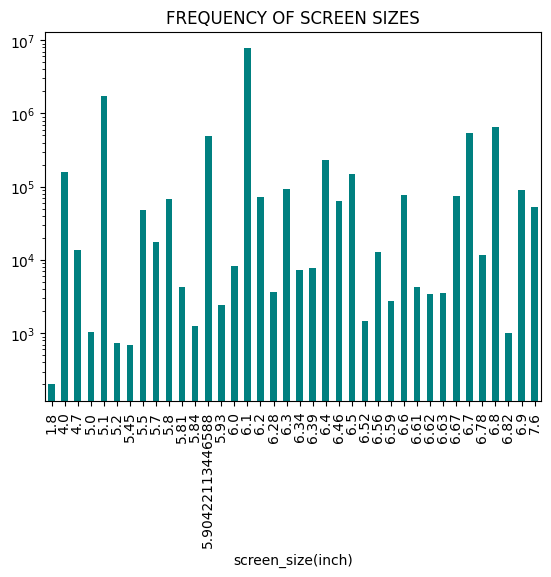

In [172]:
df.groupby('screen_size(inch)')['price(¢)'].sum().plot(kind='bar',logy=True,color='teal',title='FREQUENCY OF SCREEN SIZES')

**WE'LL SEE HOW MANY DIFFERENT BATTERIES DO MOBILE PHONES HAVE AND WHAT ARE THEIR PRICES**

<Axes: title={'center': 'BATTERY VS PRICE'}, xlabel='battery(mAh)'>

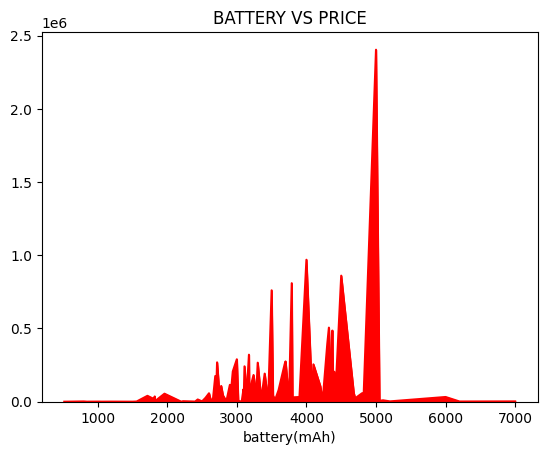

In [63]:
df.groupby('battery(mAh)')['price(¢)'].sum().plot(kind='area',color='red',title='BATTERY VS PRICE')

**LET'S SEE IF THE PRICE CHANGES WITH THE TYPE OF SIM_CARD USED**

In [64]:
df['sim_card'].unique()

array(['Single', 'Dual', 'Nano-SIM'], dtype=object)

<Axes: title={'center': 'SIM_CARD VS PRICE'}, ylabel='price(¢)'>

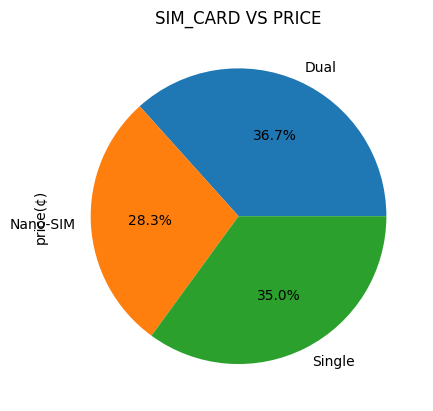

In [65]:
df.groupby('sim_card')['price(¢)'].sum().plot(kind='pie',title='SIM_CARD VS PRICE',autopct='%.1f%%')

**HOW MANY DIFFERENT DISPLAYS ARE THERE, THEIR FREQUENCY AND THEIR VARIATION WITH THE PRICE OF THE MOBILE PHONES**

In [66]:
df.display.unique()

array(['AMOLED', 'Super AMOLED', 'IPS LCD', 'P-OLED', 'IPS', 'OLED',
       'TFT', 'PLS LCD', 'Super Retina OLED', 'Retina IPS LCD', 'G-OLED',
       'P-OLED+', 'PLS', 'Monochrome', 'Super LCD3', 'Dynamic AMOLED',
       'TN', 'Retina IPS', 'Dynamic AMOLED / Dynamic AMOLED'],
      dtype=object)

In [67]:
df.display.value_counts()

display
IPS LCD                            788
Super AMOLED                       730
AMOLED                             710
OLED                               496
Super Retina OLED                  230
P-OLED                             214
Retina IPS LCD                     165
TFT                                142
IPS                                 59
P-OLED+                             22
Dynamic AMOLED                      17
PLS LCD                             14
PLS                                  5
Monochrome                           3
G-OLED                               1
Super LCD3                           1
TN                                   1
Retina IPS                           1
Dynamic AMOLED / Dynamic AMOLED      1
Name: count, dtype: int64

<Axes: title={'center': 'DISPLAY VS PRICE'}, ylabel='display'>

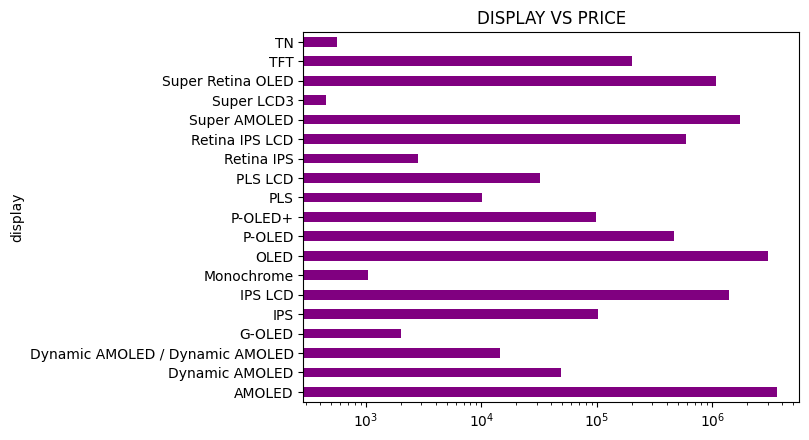

In [143]:
df.groupby('display')['price(¢)'].sum().plot(kind='barh',logx=True,title='DISPLAY VS PRICE',color='purple')

 **TO SEE WHETHER PHONES WITH OR WITHOUT SD CARD ARE MORE EXPENSIVE**

In [69]:
df.sd_card.unique()

array(['yes', 'no'], dtype=object)

In [70]:
df.sd_card.value_counts()

sd_card
yes    1848
no     1752
Name: count, dtype: int64

<Axes: title={'center': 'SD_CARD VS PRICE'}, ylabel='price(¢)'>

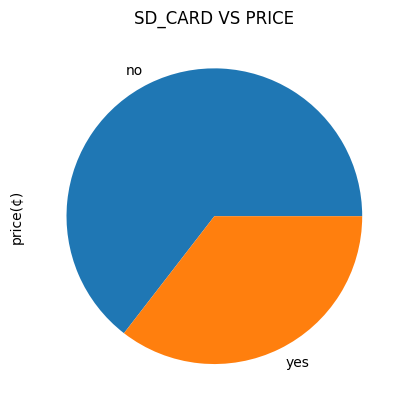

In [146]:
df.groupby('sd_card')['price(¢)'].sum().plot(kind='pie',title='SD_CARD VS PRICE')

**TO DETERMINE THE DIFFERENT BRANDS OF MOBILE PHONES, THEIR NUMBER AND THEIR VARIATION WITH THE PRICE**

In [72]:
df.brand.unique()

array(['Samsung', 'Tecno', 'LG', 'Vivo', 'Huawei', 'Infinix', 'Apple',
       'Google', 'Oppo', 'Nokia', 'Other Brand', 'Itel', 'Motorola',
       'Realme', 'Xiaomi', 'Meizu', 'OnePlus', 'Bontel', 'HTC', 'X-Tigi',
       'Honor'], dtype=object)

In [73]:
df.brand.value_counts()

brand
Samsung        1659
Apple           804
Huawei          291
Google          261
LG              234
Tecno           127
Infinix          61
Itel             40
Nokia            30
Oppo             27
Xiaomi           20
OnePlus          12
Motorola          9
Other Brand       8
Vivo              8
Realme            2
Bontel            2
X-Tigi            2
Meizu             1
HTC               1
Honor             1
Name: count, dtype: int64

<Axes: title={'center': 'BRAND VS PRICE'}, xlabel='brand'>

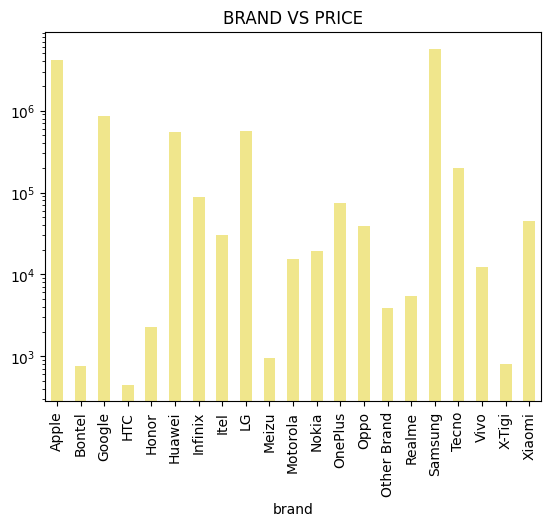

In [170]:
df.groupby('brand')['price(¢)'].sum().plot(kind='bar',logy=True,title='BRAND VS PRICE',color='khaki')

**HOW MANY UNIQUE VALUES FOR MEGAPIXELS IN SELFIE CAMERA AND HOW MANY TOTAL IN EACH OF THEM**

<Axes: xlabel='selfie_camera(MP)', ylabel='Count'>

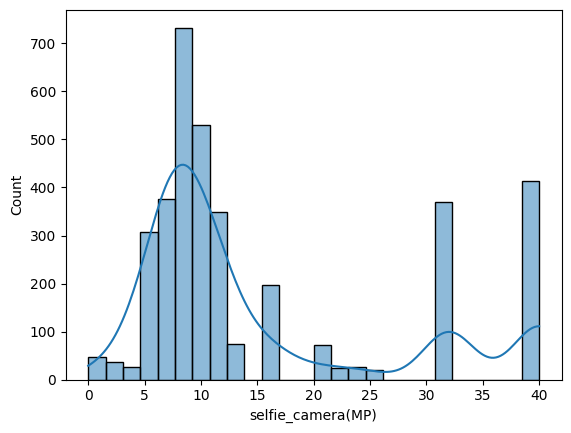

In [173]:
sn.histplot(df['selfie_camera(MP)'],kde=True)

 **LET'S SEE HOW MANY DIFFERENT COLOR SETS THERE ARE, TOTAL OF EACH OF THEM AND WHICH COLOR IS MOST FAMOUS AMONG BUYERS**

In [77]:
df.color.unique()

array(['White', 'Bronze', 'Black', 'Blue', 'Green', 'Silver', 'Gold',
       'Gray', 'Pink', 'Yellow', 'Other', 'Rose Gold', 'Purple', 'Red',
       'Orange'], dtype=object)

In [78]:
df.color.value_counts()

color
Black        1700
Gold          395
Blue          353
Other         342
White         205
Silver        132
Gray           99
Green          94
Purple         79
Rose Gold      71
Red            44
Pink           33
Bronze         22
Orange         19
Yellow         12
Name: count, dtype: int64

In [79]:
df.color.describe()

count      3600
unique       15
top       Black
freq       1700
Name: color, dtype: object

<Axes: title={'center': 'COLOR VS PRICE'}, xlabel='color'>

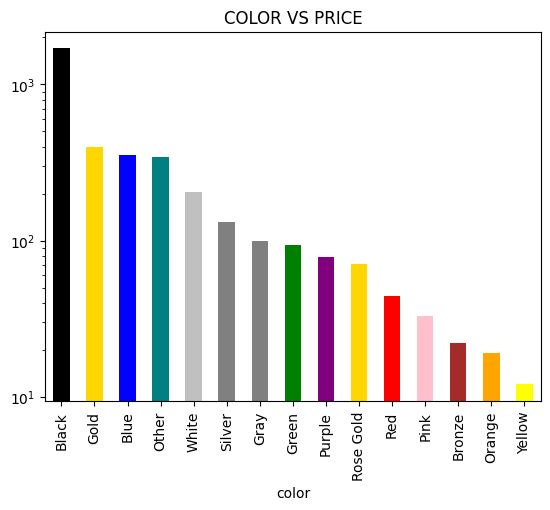

In [88]:
df['color'].value_counts().plot(kind='bar',logy=True,title='COLOR VS PRICE',color=['black','gold','blue','teal','silver','gray','gray','green','purple','gold','red','pink','brown','orange','yellow'])

**DIFFERENT REGIONS WHERE THESE SETS ARE SOLD AND HOW THE PRICE VARIES WITH THEM**

In [81]:
df.region.unique()

array(['Greater Accra', 'Ashanti', 'Eastern Region'], dtype=object)

<Axes: title={'center': 'REGION VS PRICE'}, ylabel='price(¢)'>

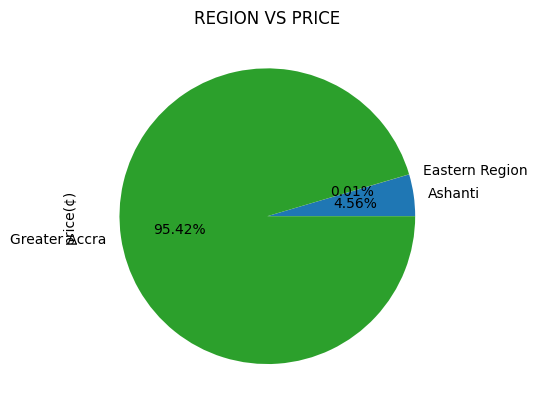

In [82]:
df.groupby('region')['price(¢)'].sum().plot(kind='pie',title='REGION VS PRICE',autopct='%.2f%%')

**DIFFERENT VALUES FOR RAM AND FREQUENCY OF EACH OF THEM**

In [83]:
df['ram(GB)'].unique()

array([ 8.        , 12.        ,  4.        ,  6.14366999,  6.        ,
        3.        ,  2.        , 16.        ,  1.        ])

<Axes: xlabel='ram(GB)'>

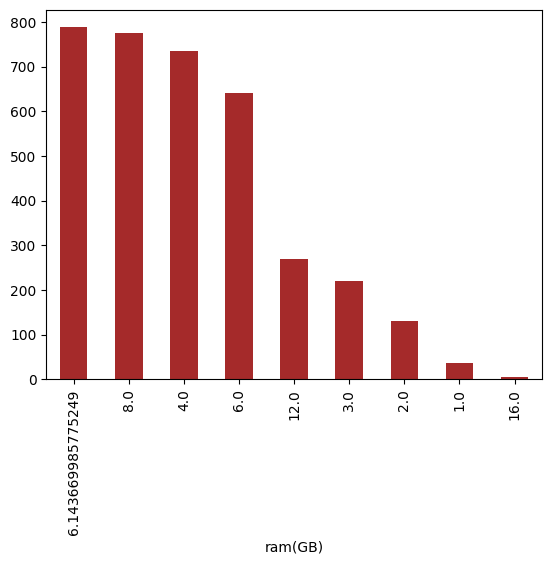

In [162]:
df['ram(GB)'].value_counts().plot(kind='bar',color='brown')

**WE'LL CALCULATE HOW MANY DIFFERENT MODELS EACH BRAND OF MOBILE PHONE HAS**

In [85]:
df.head()

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,Android,White,Greater Accra,Circle,6.10,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,Android,Bronze,Greater Accra,Circle,6.90,4500.0,128.0,12.0,10.0,5000.0
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.40,5000.0,256.0,8.0,32.0,3000.0
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.67,5000.0,256.0,8.0,32.0,1900.0
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.80,5000.0,512.0,12.0,40.0,5750.0


<Axes: xlabel='brand'>

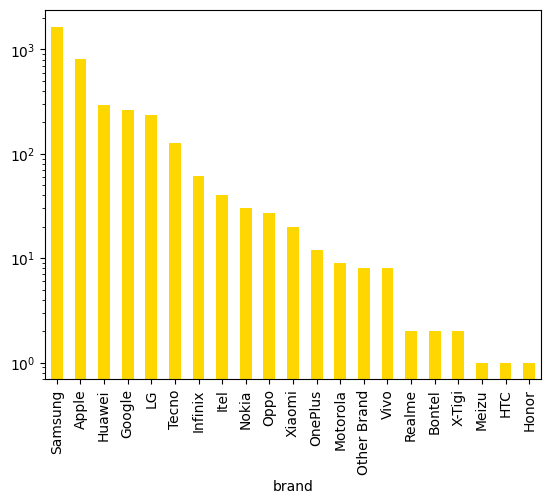

In [159]:
df['brand'].value_counts().plot(kind='bar',logy=True,color='gold')